# Homework 2 - Steam Reviews 2021

### Algorithmic Methods of Data Mining

Group #32:
- Cruoglio Antonella 2025992
- Lavagna Leonardo 1650170

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pylab

In [5]:
import scipy.stats

In [6]:
dataset = pd.read_csv('steam_reviews.csv', header='infer', nrows=None)

---------
# Introduction
---------

We have an organized dataset where the data points are given by a table with a row by column structure. The dataset has more then 21 milion rows and 23 columns as shown below.

In [7]:
dim = dataset.shape
print(dim)
dataset.head()

(21747371, 23)


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


### Rows

The dataset's rows represent user reviews of around 300 different games on Steam. The following games were reviewed.

In [8]:
print("Number of games reviewed:", len(dataset.app_name.value_counts()))
print("Number of reviews for each game:")
dataset.app_name.value_counts()

Number of games reviewed: 315
Number of reviews for each game:


PLAYERUNKNOWN'S BATTLEGROUNDS      1644255
Grand Theft Auto V                 1019116
Tom Clancy's Rainbow Six Siege      841918
Terraria                            672815
Garry's Mod                         655524
                                    ...   
Don't Escape: 4 Days to Survive       1013
Out of the Park Baseball 19            700
Shadow Complex Remastered              700
DRAGON QUEST HEROES™ II                600
Neon Hardcorps                         200
Name: app_name, Length: 315, dtype: int64

 To select a row (e.g. row 1) the following code can be used.

In [9]:
dataset.loc[1]

Unnamed: 0                                               1
app_id                                              292030
app_name                          The Witcher 3: Wild Hunt
review_id                                         85185250
language                                          schinese
review                                  拔DIAO无情打桩机--杰洛特!!!
timestamp_created                               1611381030
timestamp_updated                               1611381030
recommended                                           True
votes_helpful                                            0
votes_funny                                              0
weighted_vote_score                                    0.0
comment_count                                            0
steam_purchase                                        True
received_for_free                                    False
written_during_early_access                          False
author.steamid                           765611989495041

We now see what each dataset's column represents.

In [10]:
dataset.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

### Columns
We have:
1. `app_id`: the application unique identification number;
2. `app_name`: the name of the reviewed game;
3. `review_id`: unique identifier of a review;
4. `lenguage`: lenguage used in a review;
5. `review`:  review's text;
6. `timestamp_created`:  date the review was created (unix timestamp);
7. `timestamp_updated`: date the review was last updated (unix timestamp);
8. `recommended`: here `true`means it was a positive reccomendation;
9. `votes_helpful`: number of users who found the review helpful;
10. `votes_funny`: number of users who found the review funny;
11. `weighted_vote_score`: helpfulness score;
12. `comment_count`: number of comments posted on this review;
13. `steam_purchase`: here `true` means that the user purchased the game on Steam;
14. `received_for_free`: here `true` means that the user checked a box saying they got the app for free;
15. `written_during_early_access`: here `true`means that the user posted the review while the game was in Early Access.
16. `author.steamid`: the user’s SteamID;
17. `author.num_games_owned` number of games owned by the user;
18. `author.num_reviews` number of reviews written by the user;
19. `author.playtime_forever`: lifetime playtime tracked in this app;
20. `author.playtime_last_two_weeks` playtime tracked in the past two weeks for this app;
21. `author.playtime_at_review`: playtime when the review was written;
22. `author.last_played` time for when the user last played.

We now see the datatype of each column.


In [11]:
dataset.dtypes

Unnamed: 0                          int64
app_id                              int64
app_name                           object
review_id                           int64
language                           object
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful                       int64
votes_funny                         int64
weighted_vote_score               float64
comment_count                       int64
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
author.steamid                      int64
author.num_games_owned              int64
author.num_reviews                  int64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object

Many columns have `int` or `float` type, some have `bool` type and a few are of `object` type. We have a discrete set of data points. To select a column the following code can be used (e.g. the `app_id` column).

In [12]:
dataset.app_id
#or dataset['app_id'])

0           292030
1           292030
2           292030
3           292030
4           292030
             ...  
21747366    546560
21747367    546560
21747368    546560
21747369    546560
21747370    546560
Name: app_id, Length: 21747371, dtype: int64

### Missing Informations

We now check weather we have some missing information.

In [13]:
dataset.isnull().sum()

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33742
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

In [14]:
dataset.isnull().sum().sum()

59430

Almost 60000 eampty values. Most of the missing values are in `review` and in `author.playtime_at_review`. In any case we think that these missing values will not influence too much our analysis.

### Adjusting some data

There are some problems regarding date parsing. A conversion between unix timestamps into datetime is handy.

In [15]:
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

For example the first reviews was created in the date shown by the following code.

In [16]:
min_date = dateparse(dataset.timestamp_created.min())
min_date

Timestamp('2010-11-19 20:17:16')

Similarly the last review's date is given below.

In [17]:
max_date = dateparse(dataset.timestamp_created.max())
max_date

Timestamp('2021-01-23 18:24:47')

We now look for some outliers in the reviews. For example we see that some reviews have too many "funny reactions". This could be coused by some incorrect values that were stored in the dataset. For example the maximum value of a 4 byte unsigned integer happens to be `4294967295` and it is safe to assume that such values are incorrect (e.g. passing a negative value would produce such  outliers).

In [18]:
dataset.votes_funny.describe()

count    2.174737e+07
mean     1.267917e+05
std      2.333553e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.294967e+09
Name: votes_funny, dtype: float64

We can correct this issue in the following way.

In [19]:
def fix_votes_funny(count):
    if(count > 100000):
        return 0
    else:
        return count

dataset.votes_funny = dataset.votes_funny.apply(fix_votes_funny)

The corrected score is given below.

In [20]:
dataset.votes_funny.describe()

count    2.174737e+07
mean     8.135527e-01
std      2.788238e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.253200e+04
Name: votes_funny, dtype: float64

We also check if in the `votes_helpful`column we find the same problem.

In [21]:
dataset.votes_helpful.describe()

count    2.174737e+07
mean     4.044689e+05
std      1.333741e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.398047e+12
Name: votes_helpful, dtype: float64

Yes, it seems so. We fix it as we did before.

In [22]:
def fix_votes_helpful(count):
    if(count > 100000):
        return 0
    else:
        return count

dataset.votes_helpful = dataset.votes_helpful.apply(fix_votes_helpful)

In [23]:
dataset.votes_helpful.describe()

count    2.174737e+07
mean     1.895929e+00
std      3.983183e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.960800e+04
Name: votes_helpful, dtype: float64

---------
# Exploratory Data Analysis
---------

**[RQ1]** After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.

To have a preliminarly idea of the corrleation between hours played and reviews written we count the number of reviwes with 0 hours played, with 100 hours played, etc...

In [24]:
print("Number of reviews with 0 hours played:", len(dataset[dataset['author.playtime_at_review'] == 0]))
for i in range(0,10000,1000):
    print("Number of reviews with more than", i, "hours played:", len(dataset[dataset['author.playtime_at_review'] >= i]))

Number of reviews with 0 hours played: 0
Number of reviews with more than 0 hours played: 21721689
Number of reviews with more than 1000 hours played: 13712319
Number of reviews with more than 2000 hours played: 10561259
Number of reviews with more than 3000 hours played: 8717027
Number of reviews with more than 4000 hours played: 7492586
Number of reviews with more than 5000 hours played: 6601060
Number of reviews with more than 6000 hours played: 5912019
Number of reviews with more than 7000 hours played: 5340733
Number of reviews with more than 8000 hours played: 4880749
Number of reviews with more than 9000 hours played: 4496576


The previous result is encouraging since no review was made without playing.

**Levels of measurement**

Looking at the columns of the datasetm we have all levels of measurement: 
- **nominal** (e.g. the column `review` with the text of each review);
- **ordinal** (e.g. the columns `votes_helpful` and `votes_funny` that we can interpret as an "approval rating" of a given review);
- **intervals** (e.g. the columns that involve dates);
- **ratio scales** (e.g. the `comment_count` that we can interpret as a "weight" for a given review or the `weighted_vote_score` column).

For the **nominal** level we can use the *mode* as an estimate of the "center" (an average is not possible since it is not clear what is the meaning of the sum of two such data points), likewise for the **ordinal** level we can use a measure connected with the *median* (we can only confront and order the data points), for the level of **intervals** and the level of **ratio scales** we can an *average* as the measure of the "center" and we can also characterize the "level of dispersion" usind standard tools from statistics.

**Center of nominal columns**

In [25]:
dataset.language.describe()

count     21747371
unique          28
top        english
freq       9635437
Name: language, dtype: object

In [26]:
dataset.language.mode()

0    english
dtype: object

A pie chart with a broader set of lenaguages used in the reviews and theire percentages with respect to all the reviews.

Text(1.1, -0.2, 'Other Languages = 6.0 %')

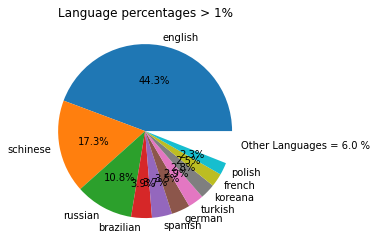

In [27]:
lenguage_percentages = dataset.language.value_counts()/dataset.language.value_counts().sum()
lenguage_percentages[0:10].plot.pie(title= 'Language percentages > 1%', 
                                    autopct = '%.1f%%', normalize=False)
pylab.ylabel('')
plt.text(1.1,-0.2, "Other Languages = 6.0 %")




We see that review in "english" are the most commn and that above all the word "good" is used in the reviews text. This gives us some preliminary indication that the users are satisfied. 

In [28]:
dataset.review.mode()

0    good
dtype: object

**Center of some ordinal columns**

In [29]:
dataset.votes_helpful.median()

0.0

In [30]:
dataset.votes_funny.median()

0.0

We see that for `votes_helpful`and `votes_funny` we have a median of zero and this can be an eraly indication that most of the reviews are neither helpufull nor funny.

**Comments on some intervals columns**

For the moment we do not concern ourselves with measures connected with dates (cfr. **[RQ3]**), but we take a quick look at the times when the reviews are commonly posted.

We suspected that during the day most reviews are written in the late afternoon, but the following plot contraddicts this belief. Even if there is oscillation in the number of reviews during the day there is a clear maximum at 14-15 in the afternoon and a minimum at 23 pm. We where somewhath surprised that between 1 am and 4 am the number of reviews (the fraction that was found funny) is comparable with the number of reviews written at 9am. 

In [31]:
hour_reviews = dataset.groupby(dateparse(dataset.timestamp_created).dt.hour)

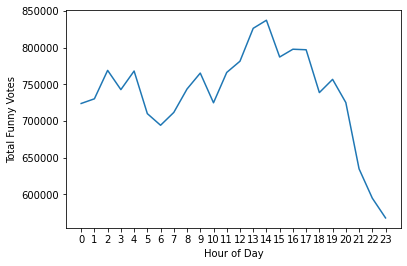

In [32]:
plt.figure() 
hour_reviews.votes_funny.sum().plot()
plt.xlabel("Hour of Day") 
plt.ylabel("Total Funny Votes") 
plt.xticks(range(0,24))
plt.show()

Here we analyse the number of helpful reviews, too. We see that most helpful reviews are written in the late afternoon, supporting the previous plot. 

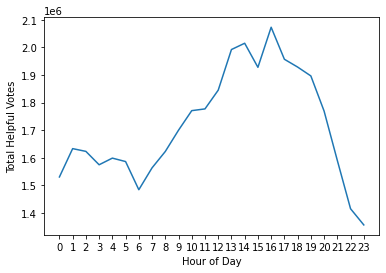

In [33]:
plt.figure() 
hour_reviews.votes_helpful.sum().plot()
plt.xlabel("Hour of Day") 
plt.ylabel("Total Helpful Votes") 
plt.xticks(range(0,24))
plt.show()

We see that, instead, comments to reviews are written mostly in the evening. Here we have a "polarization": in the morning there are few comments, then during the day the number of comments increases to have its peack at 8pm, then it decreases during the night with a minimum at 4 am. 

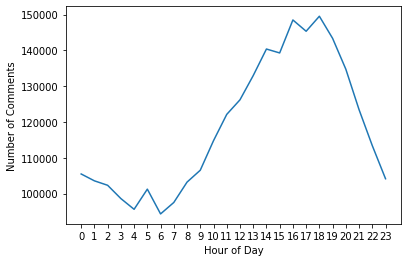

In [34]:
plt.figure() 
hour_reviews.comment_count.sum().plot()
plt.xlabel("Hour of Day") 
plt.ylabel("Number of Comments") 
plt.xticks(range(0,24))
plt.show()

**Center of some ratio scales columns**

In [35]:
dataset.recommended.describe()

count     21747371
unique           2
top           True
freq      19022610
Name: recommended, dtype: object

Since there are mostly reccomendations, we can imagine that on average players enjoy the Steam games.

In [36]:
dataset.recommended.mean()

0.8747084877523816

We see that on average the 87% of the reviews have a `true`value in the `recommended` column. This suggests once again that the users are satisfied. 

**[RQ2]** Let's explore the dataset by finding simple insights into the reviews.
- Plot the number of reviews for each application in descending order.
- What applications have the best Weighted Vote Score?
- Which applications have the most and the least recommendations?
- How many of these applications were purchased, and how many were given for free?

**Number of reviews for each application in descending order.**

<AxesSubplot:title={'center':'Number of reviews for each application in descending order'}, xlabel='Application ID', ylabel='Number of Reviews'>

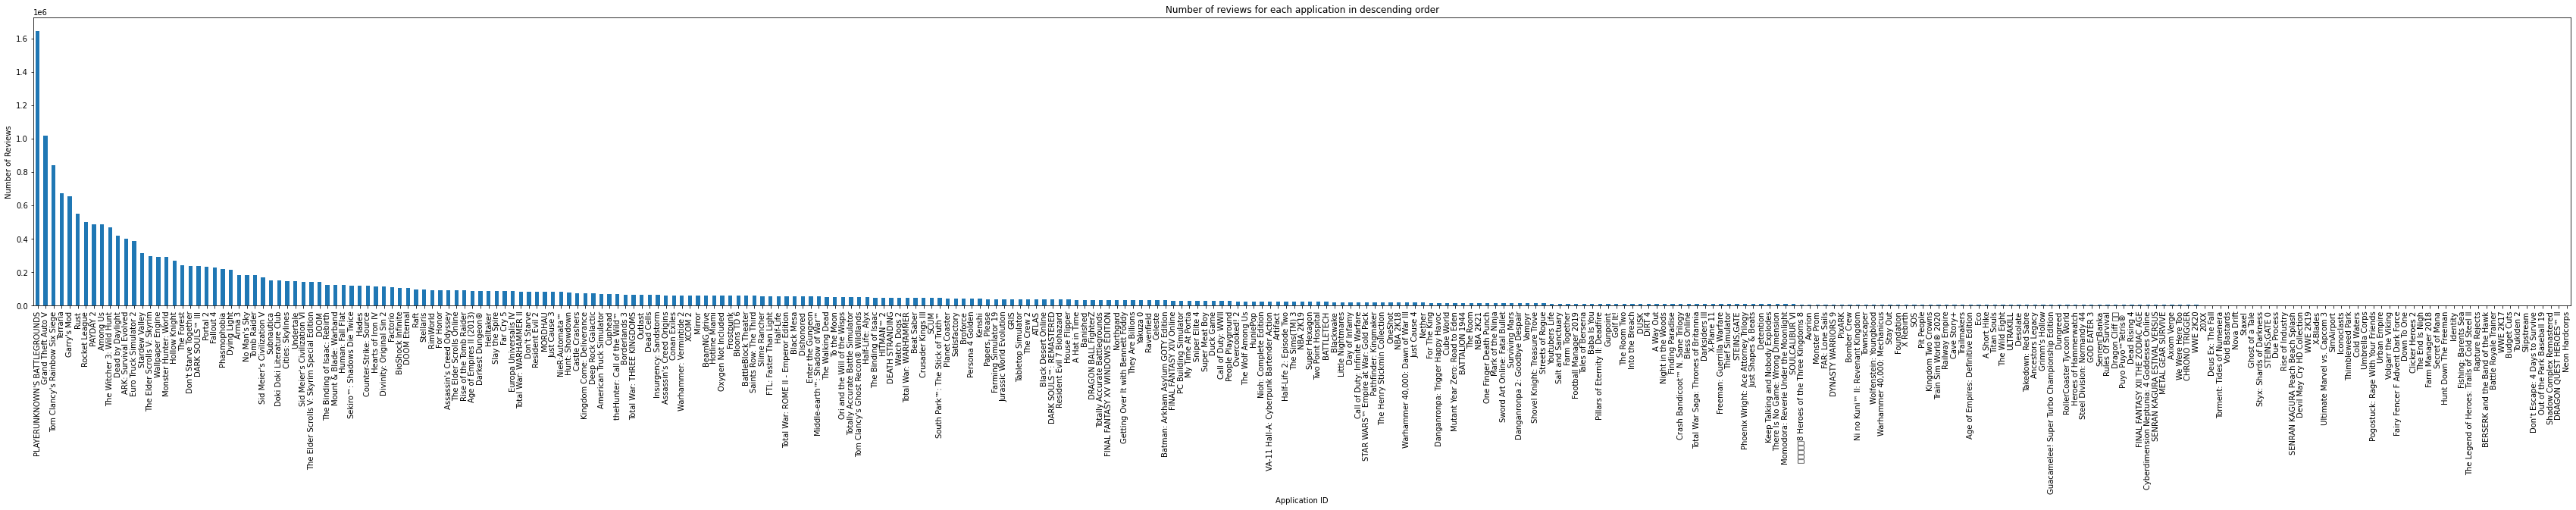

In [78]:
dataset.app_name.value_counts().plot.bar(figsize = (60, 7), 
                                       title='Number of reviews for each application in descending order', 
                                       xlabel='Application ID', 
                                       ylabel='Number of Reviews')

**Reviews with best Weighted Vote Score.**

In [38]:
#Even if the .sum() method produces some inconsistencies in some columns
#the columns of interest for the following analisys are the correct ones.
reviewed_games_for_reccomendation = dataset.groupby('app_name').sum()

We calculate the best weighted score, then we find (sorting the games) that the Game with the highest weighted score is *PLAYERUNKNOWN'S BATTLEGROUNDS*

In [39]:
dataset.weighted_vote_score.max()

0.995986759662628

In [40]:
reviewed_games_for_reccomendation['weighted_vote_score'].sort_values()

app_name
Neon Hardcorps                         50.956105
Out of the Park Baseball 19           128.113111
Don't Escape: 4 Days to Survive       164.281452
Shadow Complex Remastered             209.427348
DRAGON QUEST HEROES™ II               228.666105
                                       ...      
Garry's Mod                        101897.445127
Rust                               103548.285885
Tom Clancy's Rainbow Six Siege     136386.687399
Grand Theft Auto V                 160882.923698
PLAYERUNKNOWN'S BATTLEGROUNDS      258106.999546
Name: weighted_vote_score, Length: 315, dtype: float64

**Applications with the most and the least recommendations.** 

The least recommended is *NEON HARDCORPS* and the most recommended is *PLAYERUNKNOWN'S BATTLEGROUNDS*

In [41]:
reviewed_games_for_reccomendation['recommended'].sort_values()

app_name
Neon Hardcorps                        89
DRAGON QUEST HEROES™ II              423
Identity                             439
Shadow Complex Remastered            587
Out of the Park Baseball 19          594
                                   ...  
Garry's Mod                       632558
Terraria                          658741
Tom Clancy's Rainbow Six Siege    742397
Grand Theft Auto V                831311
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Name: recommended, Length: 315, dtype: int64

**Number of applications purchased, and number of applications given for free.**

In [42]:
print('Number of applications given for free') 
print(dataset.received_for_free.sum())

Number of applications given for free
688061


In [43]:
print('Number of applications purchased on Steam') 
print(dataset.steam_purchase.sum())

Number of applications purchased on Steam
16842432


**[RQ3]** Now it's important to understand the preferred time to do reviews.
- What is the most common time that authors review an application? For example, authors usually write a
review at 17:44.
- Create a function that receives as a parameter a list of time intervals and returns the plot the number of
reviews for each of the intervals.
- Use the function that you created in the previous literal to plot the number of reviews between the
following time intervals:

| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

- **What is the most common time that authors review an application?**

In [44]:
timecreated = dateparse(dataset.timestamp_created).dt.floor('T') #truncate sec
datetime, number = timecreated.value_counts().index[0], timecreated.value_counts()[0]
print(f'The most common time that authors review an application is {str(datetime)[10:-3]}, with {number} occurrences')

The most common time that authors review an application is  15:54, with 355 occurrences


- **Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals**

In [45]:
def interval_count(times):
    hours = pd.to_datetime(dataset['timestamp_created'],unit='s').dt.hour
    times = pd.Series(times)
    intervals = pd.to_datetime(times).dt.hour
    intervals = sorted(intervals)
    # print(intervals)
    intervals.append(24)

    barplot = pd.cut(hours, intervals).value_counts(sort=False) #segment values into bins

    return barplot.plot(kind='bar', title='#reviews for each of the intervals', color = 'seagreen')

- **Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:**

<AxesSubplot:title={'center':'#reviews for each of the intervals'}>

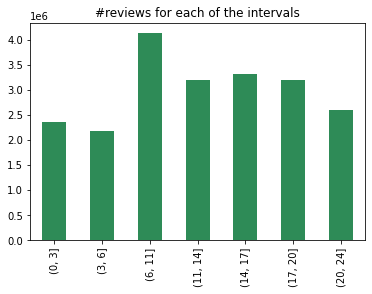

In [46]:
times = ['06:00:00','11:00:00','14:00:00','17:00:00','20:00:00','00:00:00','03:00:00']
interval_count(times)

As we can see reviews are mostly written during the six to eleven in the morning, but the overall distribution is almost uniform. It is of interest the comparison between the previous bar plot and the plots obteined in "Comments on some intervals columns".

**[RQ4]** As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some
information about it.
- What are the top 3 languages used to review applications?
- Create a function that receives as parameters both the name of a data set and a list of languages’
names and returns a data frame filtered only with the reviews written in the provided languages.
- Use the function created in the previous literal to find what percentage of these reviews (associated with
the top 3 languages) were voted as funny?
- Use the function created in the literal “a” to find what percentage of these reviews (associated with the
top 3 languages) were voted as helpful?

- **What are the top 3 languages used to review applications?**

We have seen that the most common lenguage is english and we've seen also a pie chart with the most commonly used lenguages. 

The top 3 languages used to review applications are english, standard chinese and russian.

<AxesSubplot:title={'center':'Top Languages'}, xlabel='Top Languages', ylabel='Number of Reviews'>

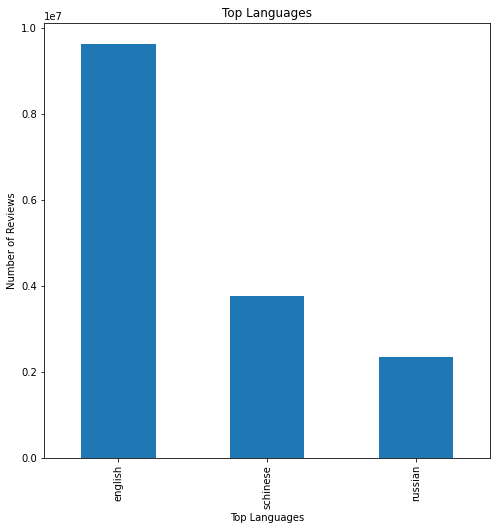

In [47]:
n = 3
top_languages = dataset.loc[:,'language'].value_counts()[:3].sort_values(ascending=False)

plt.close()
plt.rcParams['figure.figsize'] = (8, 8) 
top_languages.plot.bar(title='Top Languages', xlabel='Top Languages', 
                                         ylabel='Number of Reviews')


- **Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages**

In [48]:
def lang_reviews(data, lang):
    return data[data.language.isin(lang)] 

- **Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?**

In [49]:
l = list(dataset['language'].value_counts().index[0:3])

# dataset of reviews associated with the top 3 languages
top_three = lang_reviews(dataset, l) 

In [50]:
# reviews voted as funny
hp = top_three[top_three.votes_funny > 0]

perc = (len(hp)/len(top_three))*100

print('The percentage is: ', str(round(perc,2))+'%')

The percentage is:  12.21%


- **Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?**

In [51]:
# reviews voted as helpful
hp = top_three[top_three.votes_helpful > 0]

perc = (len(hp)/len(top_three))*100

print('The percentage is: ', str(round(perc,2))+'%')

The percentage is:  29.16%


5. [**RQ5**] *The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.*
    - Plot the top 10 most popular reviewers and the number of reviews.
    - What applications did the most popular author review? 
    - How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
    - How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?





In [52]:
top_10_reviewers = dataset[['author.steamid','author.num_reviews']].groupby('author.steamid').count().sort_values('author.num_reviews', ascending = False).head(10)
top_10_reviewers

,author.num_reviews
author.steamid,
76561198062813911,149
76561198315585536,132
76561198192166873,107
76561198239163744,106
76561198045381877,103
76561198064946151,100
76561198013146396,99
76561198027973295,96
76561197969749884,88


The application reviewed by the most reviewer can be find through the following steps:
* find the id of the most reviewer
* select the rows where the most author did a review, i.e. author.steamid = 'top 1 reviewer
* take the column with the information of the app reviewed by the most reviewer

In [53]:
top_1_reviewers = top_10_reviewers.iloc[:1, :0]
df_reviews_top_1 = dataset[dataset['author.steamid'] == top_1_reviewers.iloc[0].name]
df_reviews_top_1.iloc[:, 0:2]

,Unnamed: 0,app_id
512675,512676,70
539037,539038,240
658130,658131,420
849477,849478,620
1549581,1549582,4000
...,...,...
21578107,21578112,367520
21624890,21624895,447820
21651066,21651071,598330
21656340,21656345,543460


The total number of application purchased by the most reviewer can be find as:
* The total number of app owned is the number of df_reviews_top_1
* Tota app free = length df_reviwers_top_1
* Total app not free = total_app - total app free
* percentage free = total_app_free / total_app * 100
* percentage not free = total_app_not_free / total_app * 100

In [54]:
total_app = df_reviews_top_1['received_for_free'].shape[0]
total_app_free = df_reviews_top_1['received_for_free'].sum()
total_app_not_free = total_app - total_app_free
percentage_free = total_app_free / total_app * 100
percentage_not_free = total_app_not_free / total_app * 100
print('Total app: {} \nTotal app free: {} \nTotal app not free: {} \npercentage free: {}% \npercentage not free: {}%'.format(total_app, total_app_free, total_app_not_free, percentage_free, percentage_not_free))

Total app: 149 
Total app free: 4 
Total app not free: 145 
percentage free: 2.684563758389262% 
percentage not free: 97.31543624161074%


The total number of application purchased by the most reviewer can be find as:
* Total purchased positive are the rows where received_for_free is False and recommended is True
* Total purchased negative are the rows where received_for_free is False and recommended is False
* Total free positive are the rows where received_for_free is True and recommended is True
* Total free negative are the rows where received_for_free is True and recommended is False

In [55]:
total_purchased = df_reviews_top_1[df_reviews_top_1.received_for_free == False]
total_purchased_positive = total_purchased[total_purchased.recommended == True].shape[0]
total_purchased_negative = total_purchased[total_purchased.recommended == False].shape[0]
total_free = df_reviews_top_1[df_reviews_top_1.received_for_free == True]
total_free_positive = total_free[total_free.recommended == True].shape[0]
total_free_negative = total_free[total_free.recommended == False].shape[0]
print('Totali purchased positive: {}\nTotali purchased negative: {}\nTotali free positive: {}\nTotali free negative: {}\n'.format(total_purchased_positive, total_purchased_negative, total_free_positive, total_free_negative))

Totali purchased positive: 142
Totali purchased negative: 3
Totali free positive: 4
Totali free negative: 0




6. [**RQ6**] *It's time to get information from the updates that a user does to his reviews.*
    - What is the average time (days and minutes) a user lets pass before he updates a review?
    - Plot the top 3 authors that usually update their reviews.

For finding the average time (days and minutes) a user lets pass before he updates a review we calculate
* the differences between the timestamps_updated and the timestamps_created
* the average between those differences
* the days and the minutes through the previous average value

In [56]:
import datetime as dtm
dataset['timestamp_updated_diff'] = dataset['timestamp_updated'] - dataset['timestamp_created']
mean_difference_review_update = np.mean(dataset['timestamp_updated_diff'])
delta_date = dtm.timedelta(seconds=mean_difference_review_update)
days = delta_date.days
minutes = delta_date.seconds // 60
print('Days: {}, minutes: {}'.format(days, minutes))

Days: 36, minutes: 213


The three reviewers that usually update their reviews can be find with the following steps:
* select only the columns author.steamid, timestamp_updated_diff
* filter only the rows which there were an update, i.e. timestamp_update_diff > 0
* group the rows by the author's id
* count the number of updates the author did (i.e. count the number of rows where timestamp_update > 0)
* sort the values obtained in discending order, so that the first rows contains the authors'id with the most reviews
* take the first three rows

In [57]:
dataset[['author.steamid','timestamp_updated_diff']][dataset.timestamp_updated_diff > 0].groupby('author.steamid').count().sort_values('timestamp_updated_diff', ascending = False).rename(columns={"timestamp_updated_diff": "num_update"}).head(3)

,num_update
author.steamid,
76561198192166873,95
76561198206999976,61
76561198072450805,60


7. [**RQ7**] *Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.*
    - What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?
    - What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?
    - Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?


- **What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?**

In [58]:
prob = sum(dataset.weighted_vote_score >= 0.5) / len(dataset.weighted_vote_score)

print("The probability is equal to:", prob)

The probability is equal to: 0.21998484322541792


Using a classic definition of probability, we have computed it as the ratio between the number of reviews that have a Weighted Vote Score equal to or bigger than 0.5 and the total number of reviews.

Note: we assume that *all* the reviews have been rated. Indeed thanks to this assumption we can use the uniform probability, otherwise the probability that a review has a Weighted Vote Score equal to or bigger than 0.5 should be calculated considering the events: "the review has a Weighted Vote Score equal to or bigger than 0.5" given that "the review was rated". In any case an estimate of such probability can be obtained using Markov's inequality.

The result just obtained is somewhat surprising. We expected a lower number since it seems that 1 in 5 reviews positive rated and this is a lot, also in comparison with what was found in the "center of some ordinal columns".

- **What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?**

The probability is given by the following formula:

$ P( \text{vote_funny > 0} \mid \text{weighted_vote_score > 0.5}) = 
\frac{ P( \text{vote_funny > 0} \  \cap \ \text{weighted_vote_score > 0.5})}{P(\text{weighted_vote_score > 0.5})}$

In [83]:
votesfunny = dataset[dataset.votes_funny > 0] 


#prob that Weighted Vote Score is bigger than 0.5 AND a review has at least one vote as funny
num_prob = sum(votesfunny.weighted_vote_score >= 0.5)/len(dataset)


#prob that Weighted Vote Score is bigger than 0.5:
den_prob = sum(dataset.weighted_vote_score >= 0.5) /len(dataset)

prob = num_prob / den_prob
print("The probability is equal to:", prob)

The probability is equal to: 0.2490499764636633


- **Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?**

We know that if $ P( \text{vote_funny > 0} \  \cap \ \text{weighted_vote_score > 0.5}) = 
 P( \text{vote_funny > 0}) \times P(\text{weighted_vote_score > 0.5})$, they are independent

In [60]:
funny = sum(dataset.votes_funny >= 0.5) /len(dataset)
weightscore = den_prob
print('Are independent?: ', funny*weightscore == num_prob, 
      'P(Funny)*P(WeightedScore) = ', funny*weightscore, 
      'P(Funny AND WeightedScore) = ', num_prob,  sep ='\n')

Are independent?: 
False
P(Funny)*P(WeightedScore) = 
0.026324798319535925
P(Funny AND WeightedScore) = 
0.054787220027652996


They are not independent.


8. [**RQ8**] *Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.*
    - Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.
    - Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score?  Use an appropriate statistical test or technique and support your choice.
    - Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review?  Use an appropriate statistical test or technique and support your choice.
    - What are histograms, bar plots, scatterplots and pie charts used for?
    - What insights can you extract from a Box Plot?

- **Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.**

In [61]:
chinese = dataset.weighted_vote_score[dataset.language == 'schinese']
russian = dataset.weighted_vote_score[dataset.language == 'russian']

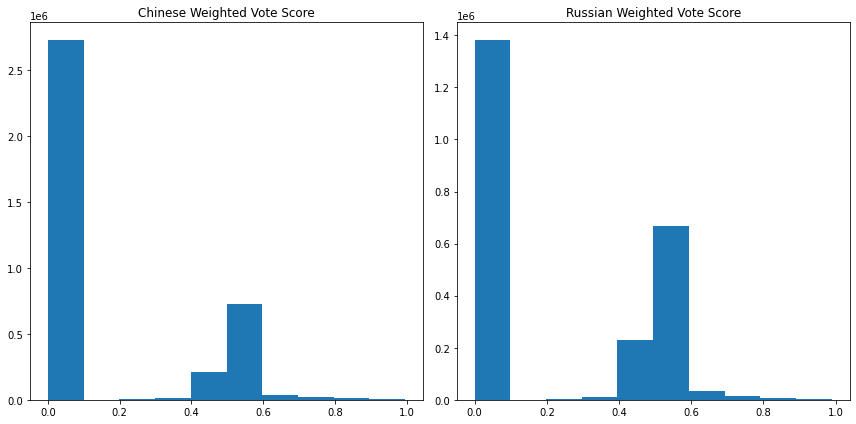

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].set_title('Chinese Weighted Vote Score')
axes[0].hist(chinese)
axes[1].set_title('Russian Weighted Vote Score')
axes[1].hist(russian)
fig.tight_layout()

We can use statistical tests to test if there's a significative difference between the two groups (chinese and russian). 

Since the distributions aren't normal we can't use parametric tests like T-Student test, therefore we use non-parametric statistical tests like Wilcoxon-Mann-Whitney test and Kolmogorov-Smirnov test. These two allow us to compare the value of a continuous variable between two groups.

In [63]:
# Wilcoxon-Mann-Whitney test
scipy.stats.mannwhitneyu(chinese, russian)

MannwhitneyuResult(statistic=3856768317304.5, pvalue=0.0)

In [64]:
# Kolmogorov-Smirnov test
scipy.stats.ks_2samp(chinese, russian)

KstestResult(statistic=0.13670113636225234, pvalue=0.0)

In both cases, the test has p-value = 0. this means that we reject the null hypothesis that the two samples are drawn from a single population.

- **Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.**

In [65]:
timediff = dataset.timestamp_updated - dataset.timestamp_created
weightscore = dataset.weighted_vote_score

We can calculate the correlation index to see if there is a linear relationship between the two variables.

In [66]:
scipy.stats.pearsonr(timediff,weightscore)

(0.07204700562319301, 0.0)

In [67]:
scipy.stats.spearmanr(timediff, weightscore)

SpearmanrResult(correlation=0.1442501958037846, pvalue=0.0)

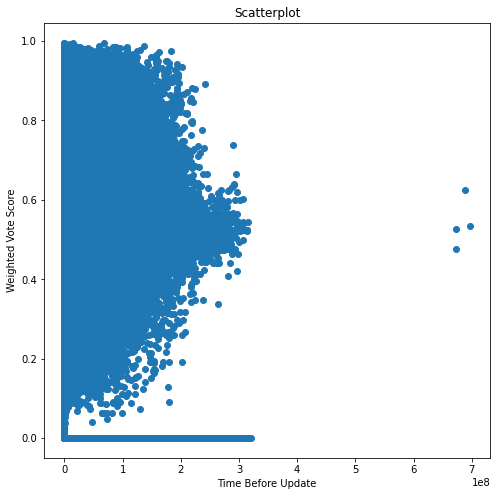

In [68]:
plt.scatter(timediff, weightscore)
plt.title("Scatterplot")
plt.xlabel("Time Before Update")
plt.ylabel("Weighted Vote Score")
plt.show()

We can see that there is no structure in the scatterplot expressing a relationship between the two variables.

- **Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.**

In [69]:
# Recommended
Rtimediff = dataset.timestamp_updated[dataset['recommended'] == True] - dataset.timestamp_created[dataset['recommended'] == True]
Rweightscore = dataset.weighted_vote_score[dataset['recommended'] == True]

# NOT Recommended
NRtimediff = dataset.timestamp_updated[dataset['recommended'] == False] - dataset.timestamp_created[dataset['recommended'] == False]
NRweightscore = dataset.weighted_vote_score[dataset['recommended'] == False]

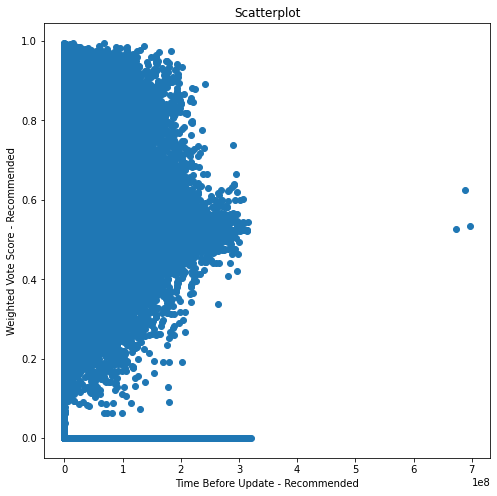

In [70]:
plt.scatter(Rtimediff, Rweightscore)
plt.title("Scatterplot")
plt.xlabel("Time Before Update - Recommended")
plt.ylabel("Weighted Vote Score - Recommended")
plt.show()

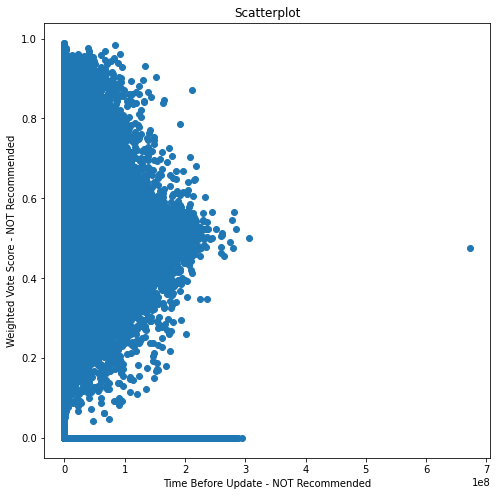

In [71]:
plt.scatter(NRtimediff, NRweightscore)
plt.title("Scatterplot")
plt.xlabel("Time Before Update - NOT Recommended")
plt.ylabel("Weighted Vote Score - NOT Recommended")
plt.show()

Even when conditioning through the variable 'recommended', we don't notice a significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score.

- **What are histograms, bar plots, scatterplots and pie charts used for?**

Histograms are used to represent the density distribution of numerical data.

For discrete variables we use barplots or pie charts. The first is like an histogram but for discrete values. They use a series of rectangular bars to show absolute values or proportions for each of the categories. 
Pie charts show how much each category represents as a proportion of the whole, by using a circular format with different-sized “slices” for different percentages of the whole. 

Scatterplot allows us to visualize the relationship of two quantitative variables.

- **What insights can you extract from a Box Plot?**

A boxplot is a simple and powerful representation of a distribution.
It shows almost everything: position, dispersion, symmetry, suspected outliers.

The boxplot allows you to see so much in one graph:
- Position: median
- Dispersion: IQR
- Asymmetry: segments (Q3 - Med) vs (Med −Q1)
- Symmetry: Box SX = Box DX
- Positive asymmetry: SX box shorter than DX box
- Negative asymmetry: SX box longer than DX box
- Outliers and length of tails:whiskers

In addition, parallel box plots allow you to make very useful comparisons.

<img src="box.png" alt="Drawing" style="width: 500px;"/>

# Theoretical Questions

**TQ1**
We are given the following algorithm.
  ```
  Input:
      A: array of length n
      k: integers between 1 and n
  function alg(A, k):
    s <-- a random element of A
    set L = [all the elements of A with value <= s]
    set R = [all the elements of A with value > s]
    r = len(L)
    if k == r:
      return s
    else if k < r:
      return alg(L, k)
    else:
      return alg(R, k - r)
  ```

The algorithm proposed doesn't end in a finite number of steps for all possible cases, e.g. `A=[1,2,3,4,5,6], k=2, s=6` produces an endless sequence of callings, indeed we are in the case `k<r` and `alg(L,k)=alg(A,k)` forever. Ofcourse the case `s=constant` in each recursive step is unlikely, but still possible.  In any case, discarding these "unluky" cases the "average worst case's" execution time is $T(n)=O(n^2)$ and the algorithm output is an element from the list given in input. 

**TQ2**

You are given the recursive function splitSwap, which accepts an array a, an index l, and a length n.

``` 
function splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)
The subroutine swapList is described here:
``` 
``` 
function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp
``` 

We have a *divide and conquer* algorithm (divide the list by $n/2$ and swap the values) to output a list with a permutation of some elements of the original list passed in input.

The algorithm has *complexity* $T(n)$,  given by $T(1)=\Theta(1)$ for $n \leq 1$, else  for $n>1$ the following recursive equation holds: $$T(n)=2T(n/2) + O(n)\ .$$
We can use the *master's theorem*: if $T(n)=aT(n/b) +f(n)$ and $T(1)=\Theta(1)$, then we can solve the recursion looking at the asymptotic behavior of $f(n)$. Since in our case $a=b=2$ and $f(n)=O(n^{log_2(2)})$ we have $T(n)=\Theta(n\log n)$.

Is the algorithm optimal? No, indeed it's possible to reverse an array with $O(n)$ complexity since it suffice to read the list and execute opportune exchanges as shown in the following pseudocode.

`swap(A,n)
  if n <= 1:
    return
  for i=0,..., i=n/2:
    temp = A[0+i]
    A[start+i]=A[end-i-1]
    A[end - i - 1]= temp`


		

**TQ3**

In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:

- Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded
- Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded
- Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded
- For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

We assume that here "order" means "partial order" on $\{1,2,3,\dots,\}^2$, but this is not restrictive.

We give some counterexamples to the *knapsack problem*'s heuristics proposed. A set $A=\{(x,y)\}$ represent an object $(x,y)$ with weight $x$ and value $y$.
- Counterexample 1: if $m$ is the maximum allowed weight, the algorithm takes an object $a\in \{(m,1)\}$. A better solution is, for example, given by taking $[m/2]$ copies of $b\in \{(1,2)\}$.
- Counterexample 2: if $n$ is the maximum possible value and $m$ is the maximum allowed weight, the algorithm takes an object $a\in \{(m,n)\}$. A better solution is, for example, given by $m$ copies of $b\in \{(1,n-1)\}$.
- Counterexample 3: suppose there are only three objects $a\in \{(7,35)\}, b\in \{(6,24)\}, c\in \{(4,12)\}$. Then the algorithm takes an object of value 35 instead of two objects with the first object of value 24 and the second object with value 12. 
